<center>Проект по курсу "Модели экономических сетей".</center>
<center>Выполнили студенты групп э521, э522:</center>
<center>Ибрагимов Мохамед, Мирхалилов Дониёр. </center>
<center>Преподаватель: </center>
<center>к.э.н. Тищенко Сергей Александрович.</center>

<center><h1>ПРОЕКТ</h1></center>

<h3>Импорт необходимых библиотек</h3>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

<h3>Загрузка данных </h3>

In [2]:
data = pd.read_csv('flights.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data=data[0:100000:1]
data

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0      2015      1    1            4      AS             98      N407AS   
1      2015      1    1            4      AA           2336      N3KUAA   
2      2015      1    1            4      US            840      N171US   
3      2015      1    1            4      AA            258      N3HYAA   
4      2015      1    1            4      AS            135      N527AS   
...     ...    ...  ...          ...     ...            ...         ...   
99995  2015      1    7            3      EV           4992      N837AS   
99996  2015      1    7            3      NK            394      N522NK   
99997  2015      1    7            3      OO           5606      N582SW   
99998  2015      1    7            3      UA           1135      N38473   
99999  2015      1    7            3      AA             74      N4XLAA   

      ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                ANC                 SEA                    5  ...   
1                LAX                 PBI                   10  ...   
2                SFO                 CLT                   20  ...   
3                LAX                 MIA                   20  ...   
4                SEA                 ANC                   25  ...   
...              ...                 ...                  ...  ...   
99995            ATL                 BQK                 1108  ...   
99996            LAS                 PHL                 1108  ...   
99997            SFO                 BFL                 1108  ...   
99998            ORD                 MCO                 1109  ...   
99999            HOU                 DFW                 1109  ...   

       ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0             408.0          -22.0         0          0                  NaN   
1             741.0           -9.0         0          0                  NaN   
2             811.0            5.0         0          0                  NaN   
3             756.0           -9.0         0          0                  NaN   
4             259.0          -21.0         0          0                  NaN   
...             ...            ...       ...        ...                  ...   
99995        1208.0          -11.0         0          0                  NaN   
99996        1844.0            2.0         0          0                  NaN   
99997        1232.0            7.0         0          0                  NaN   
99998        1453.0           -1.0         0          0                  NaN   
99999        1212.0           -8.0         0          0                  NaN   

       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                   NaN             NaN            NaN                  NaN   
1                   NaN             NaN            NaN                  NaN   
2                   NaN             NaN            NaN                  NaN   
3                   NaN             NaN            NaN                  NaN   
4                   NaN             NaN            NaN                  NaN   
...                 ...             ...            ...                  ...   
99995               NaN             NaN            NaN                  NaN   
99996               NaN             NaN            NaN                  NaN   
99997               NaN             NaN            NaN                  NaN   
99998               NaN             NaN            NaN                  NaN   
99999               NaN             NaN            NaN                  NaN   

       WEATHER_DELAY  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
99995            NaN  
99996            NaN  
99997            NaN  
99998            NaN  
99999            NaN  

[100000 rows x 31 columns]

In [4]:
df = nx.from_pandas_edgelist(data, source='ORIGIN_AIRPORT', target='DESTINATION_AIRPORT', edge_attr=True)

In [47]:
pos = nx.spring_layout(df, k = 0.15)

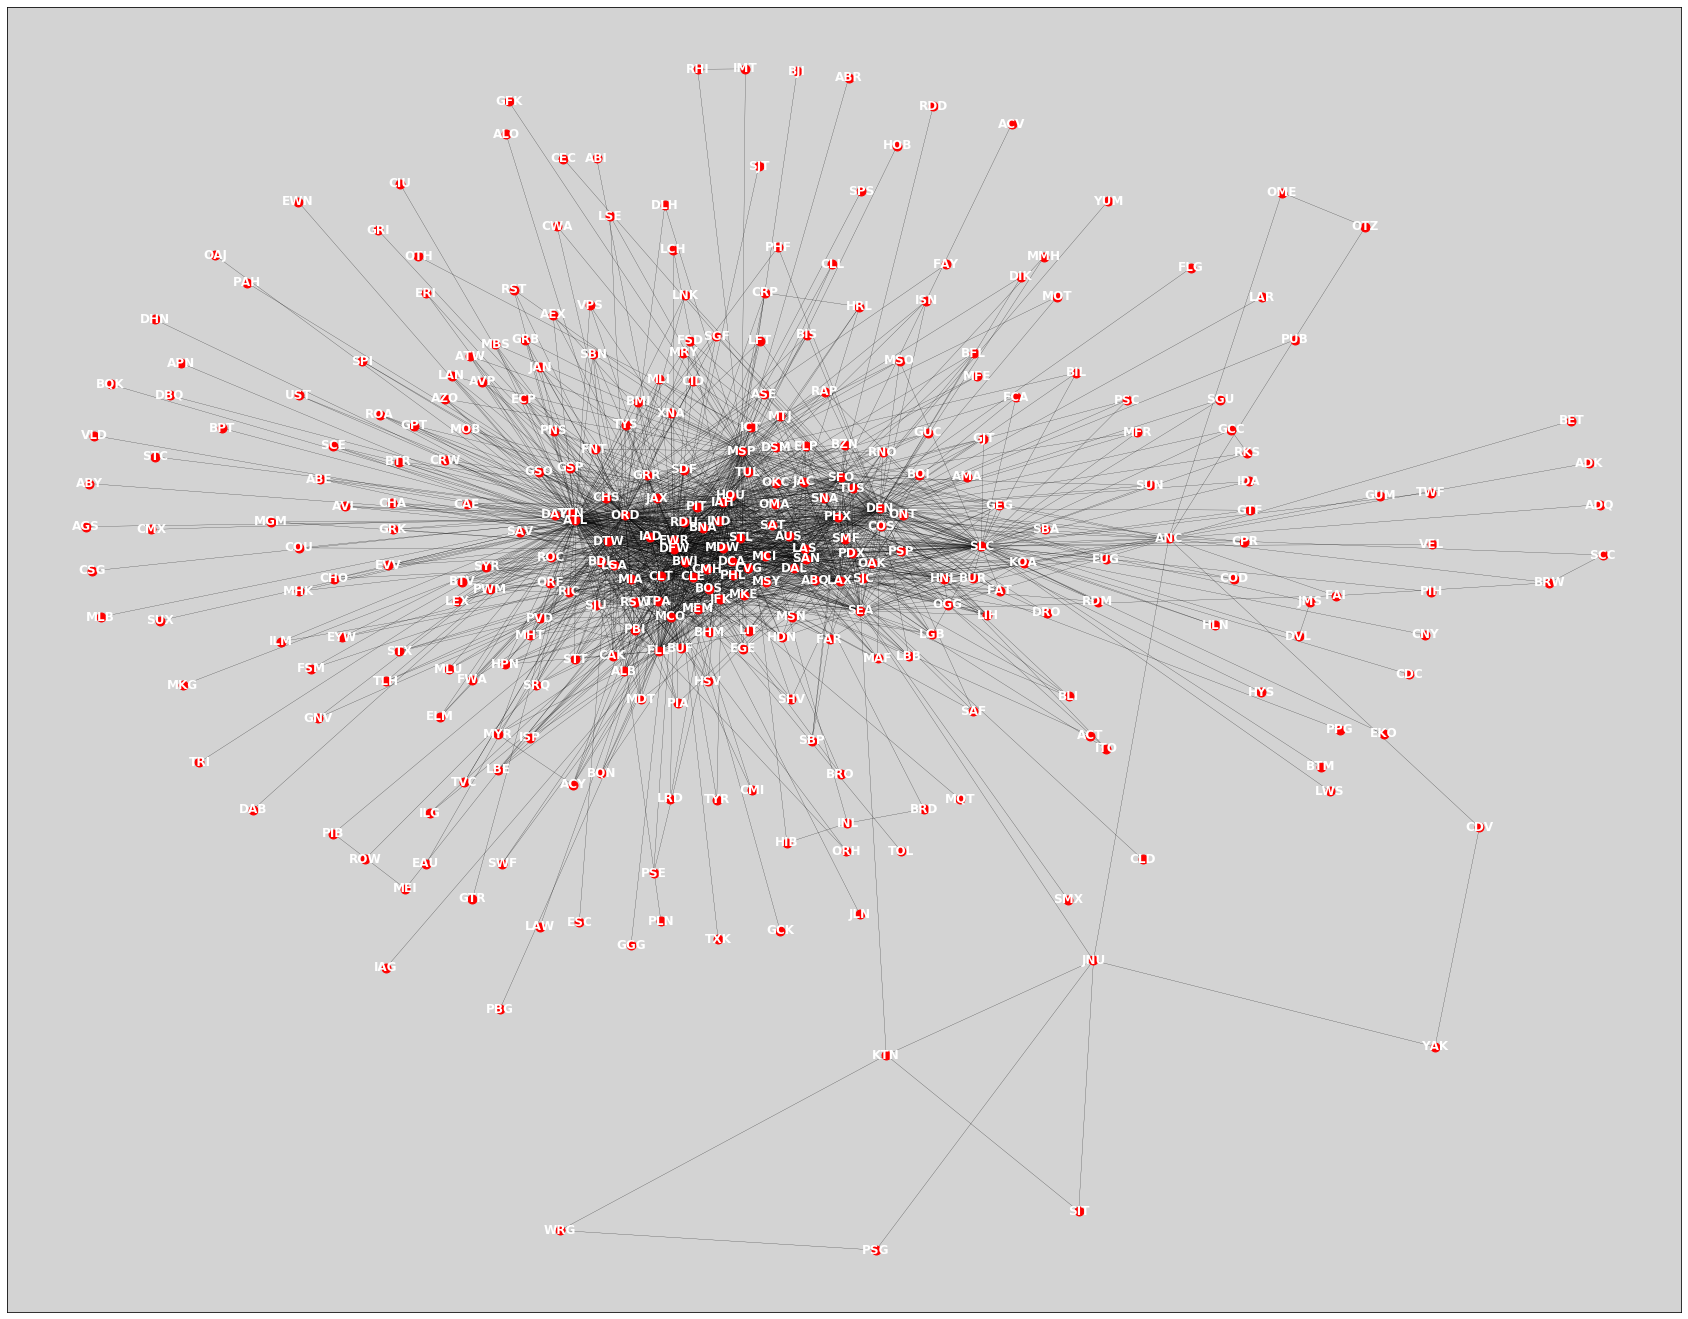

In [48]:
plt.figure(figsize=(30,24))
ax = plt.axes()
ax.set_facecolor("lightgrey")
nx.draw_networkx(df, pos, with_labels=True,
                 font_color='white',font_weight='bold', node_color='red', node_size= 80, width= .2)

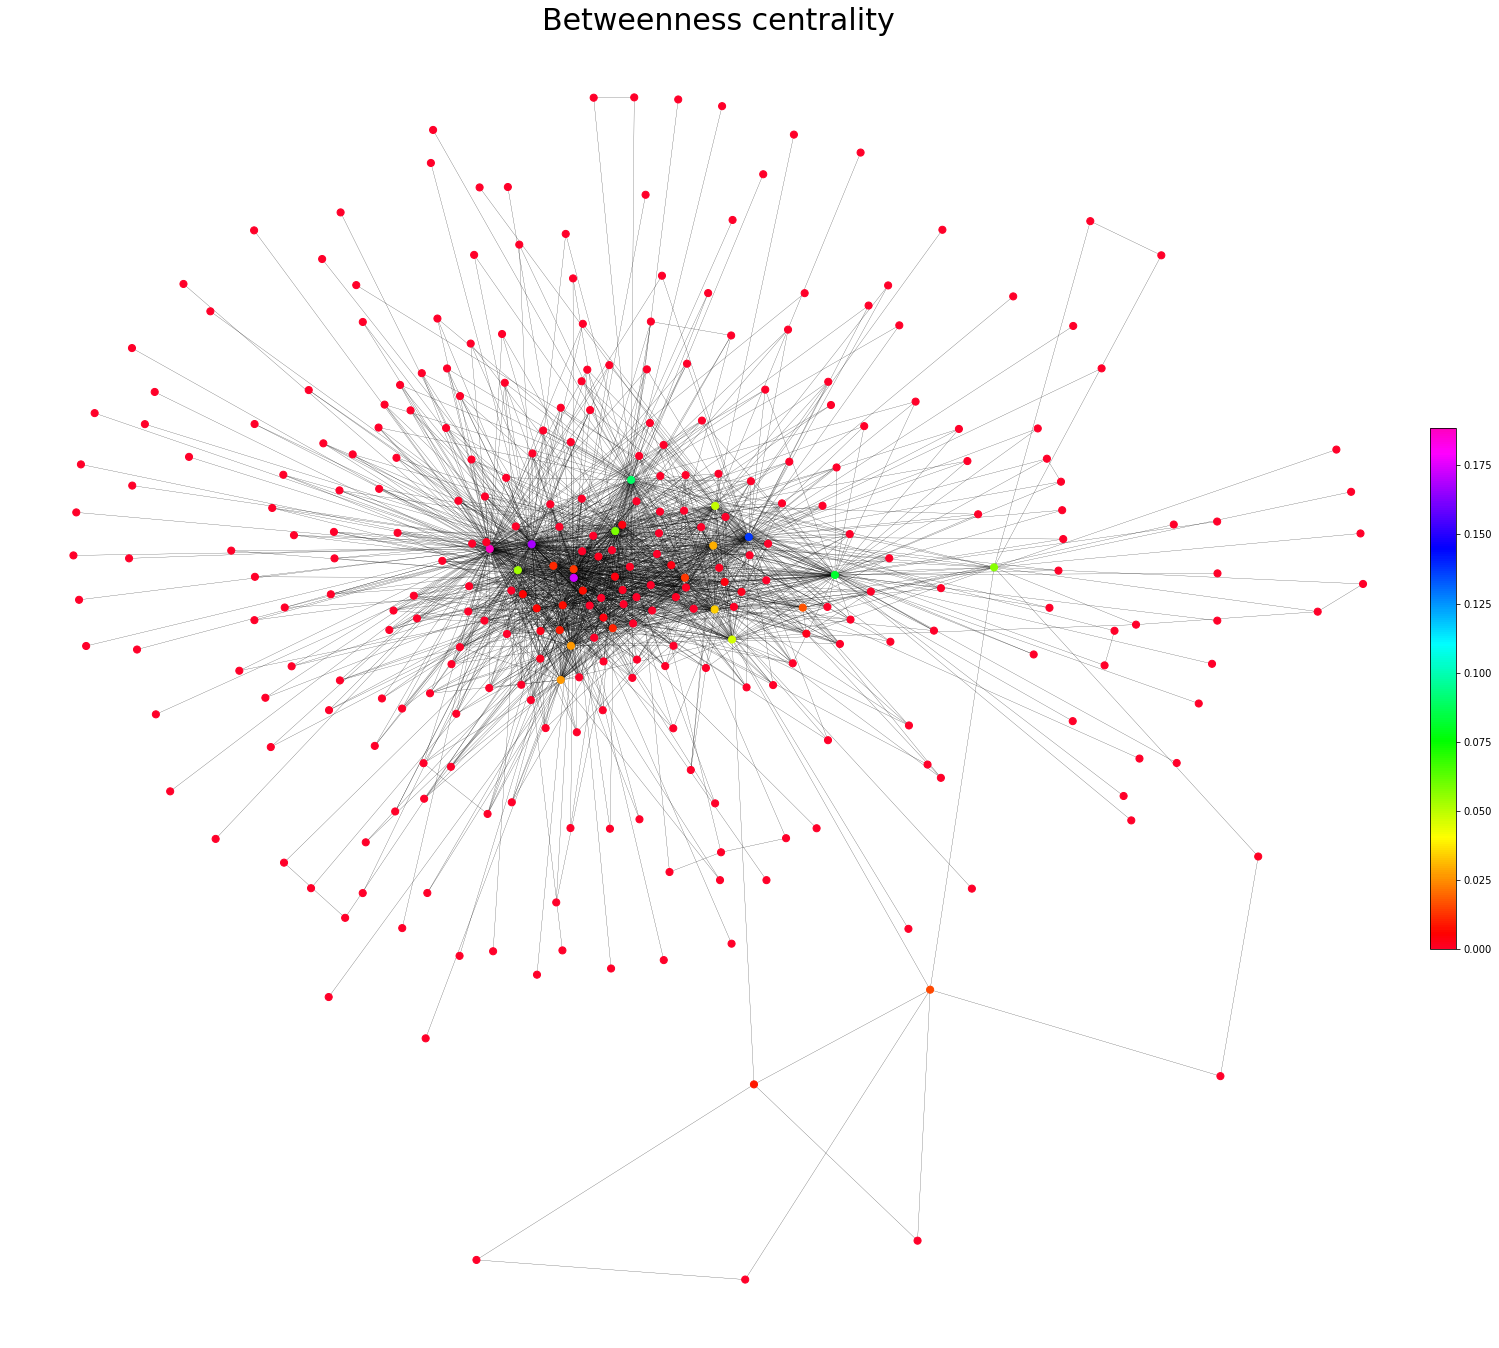

In [49]:
plt.figure(figsize=(30,24))
ax = plt.axes()
ax.set_facecolor("lightgrey")
between_centr = nx.betweenness_centrality(df)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(df, pos, 
                               node_color=node_colors,
                               node_size = 50,
                               nodelist=list(between_centr.keys()),
                               cmap = 'gist_rainbow',
                               with_labels = True)

edges = nx.draw_networkx_edges(df, pos, width = .2)

plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 30)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]

(-0.8234672839659016,
 1.0588504521882935,
 -1.0862425621146012,
 0.7514744872536008)

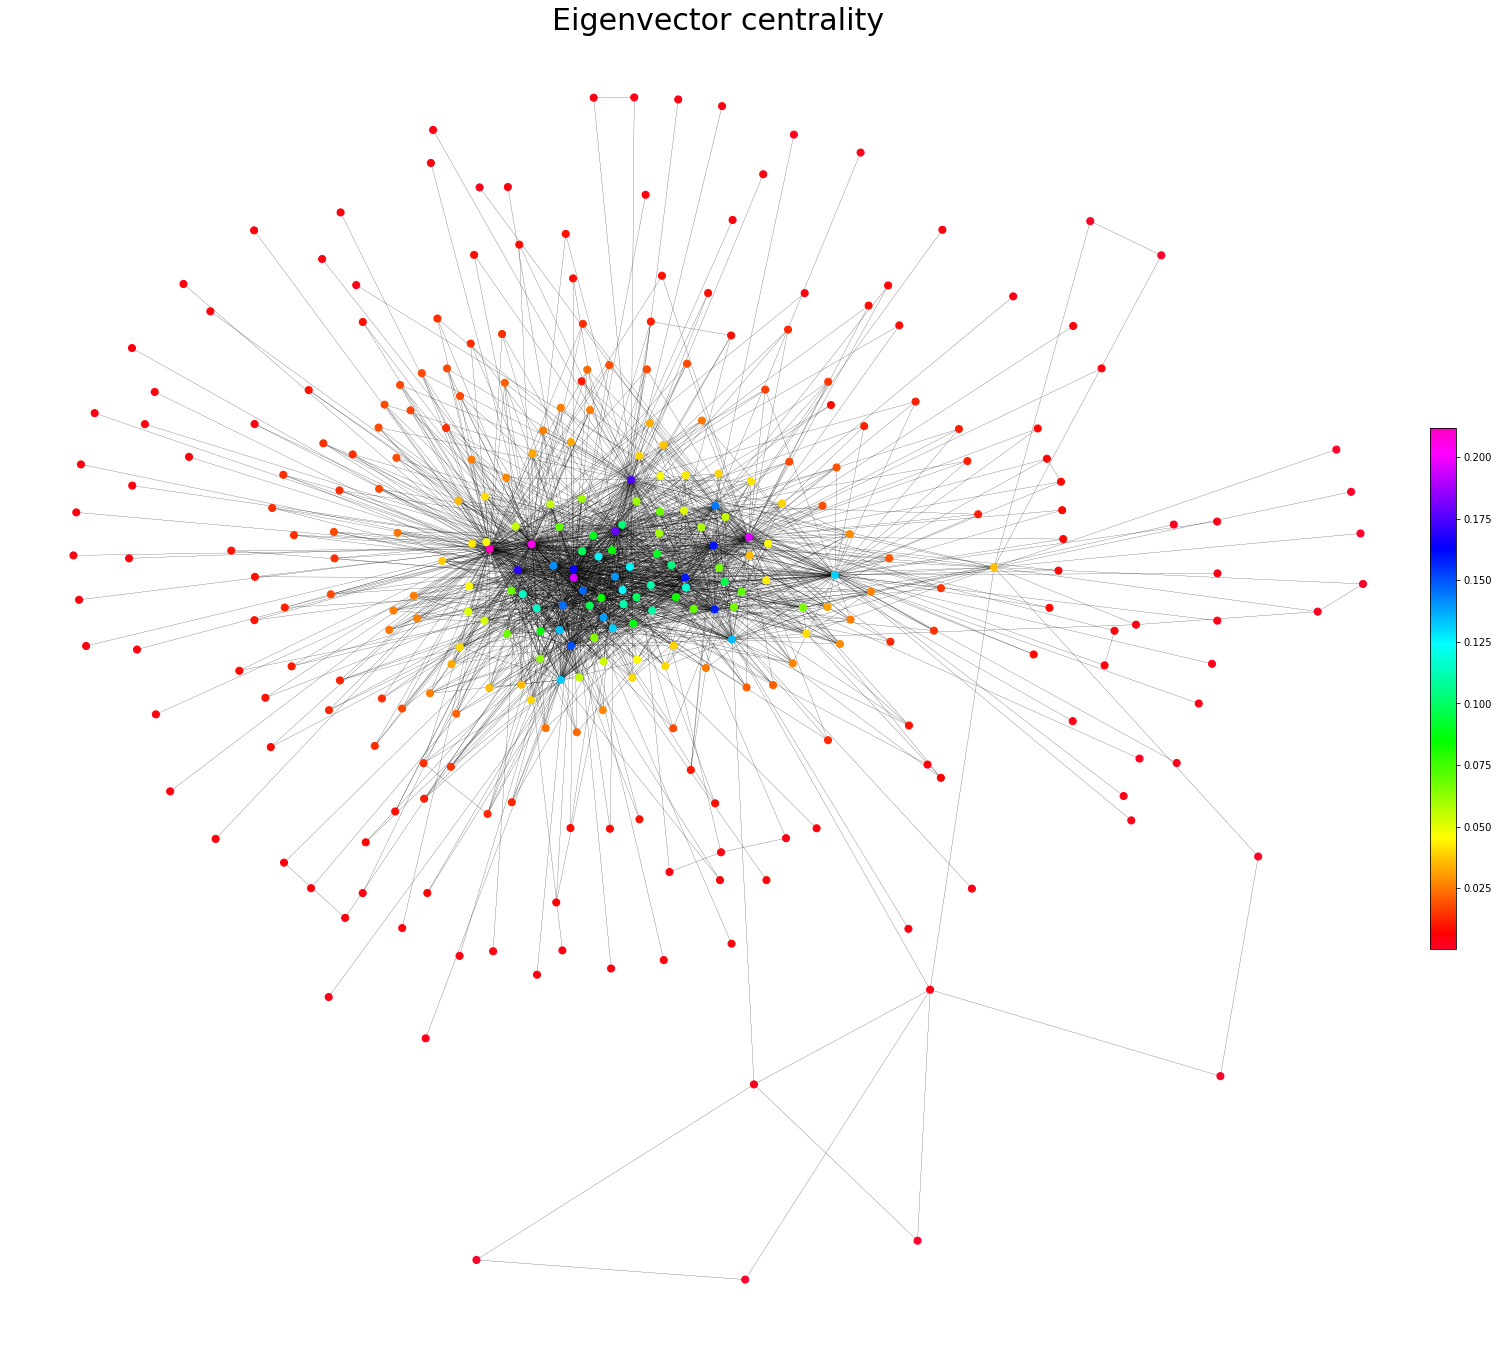

In [50]:
plt.figure(figsize=(30,24))
eigenvect_centr = nx.eigenvector_centrality(df) ##### На 100 итерациях не сходился
node_colors = list(eigenvect_centr.values())

nodes = nx.draw_networkx_nodes(df, pos , 
                               node_color=node_colors,
                               node_size = 50,
                               nodelist=list(eigenvect_centr.keys()),
                               cmap = 'gist_rainbow',
                               with_labels = True
                               )
edges = nx.draw_networkx_edges(df, pos , width = .2)
# plt.xlim([-.95, 1.05])
# plt.ylim([-.6, .95])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Eigenvector centrality', fontsize = 30)
plt.axis("off")

(-0.8234672839659016,
 1.0588504521882935,
 -1.0862425621146012,
 0.7514744872536008)

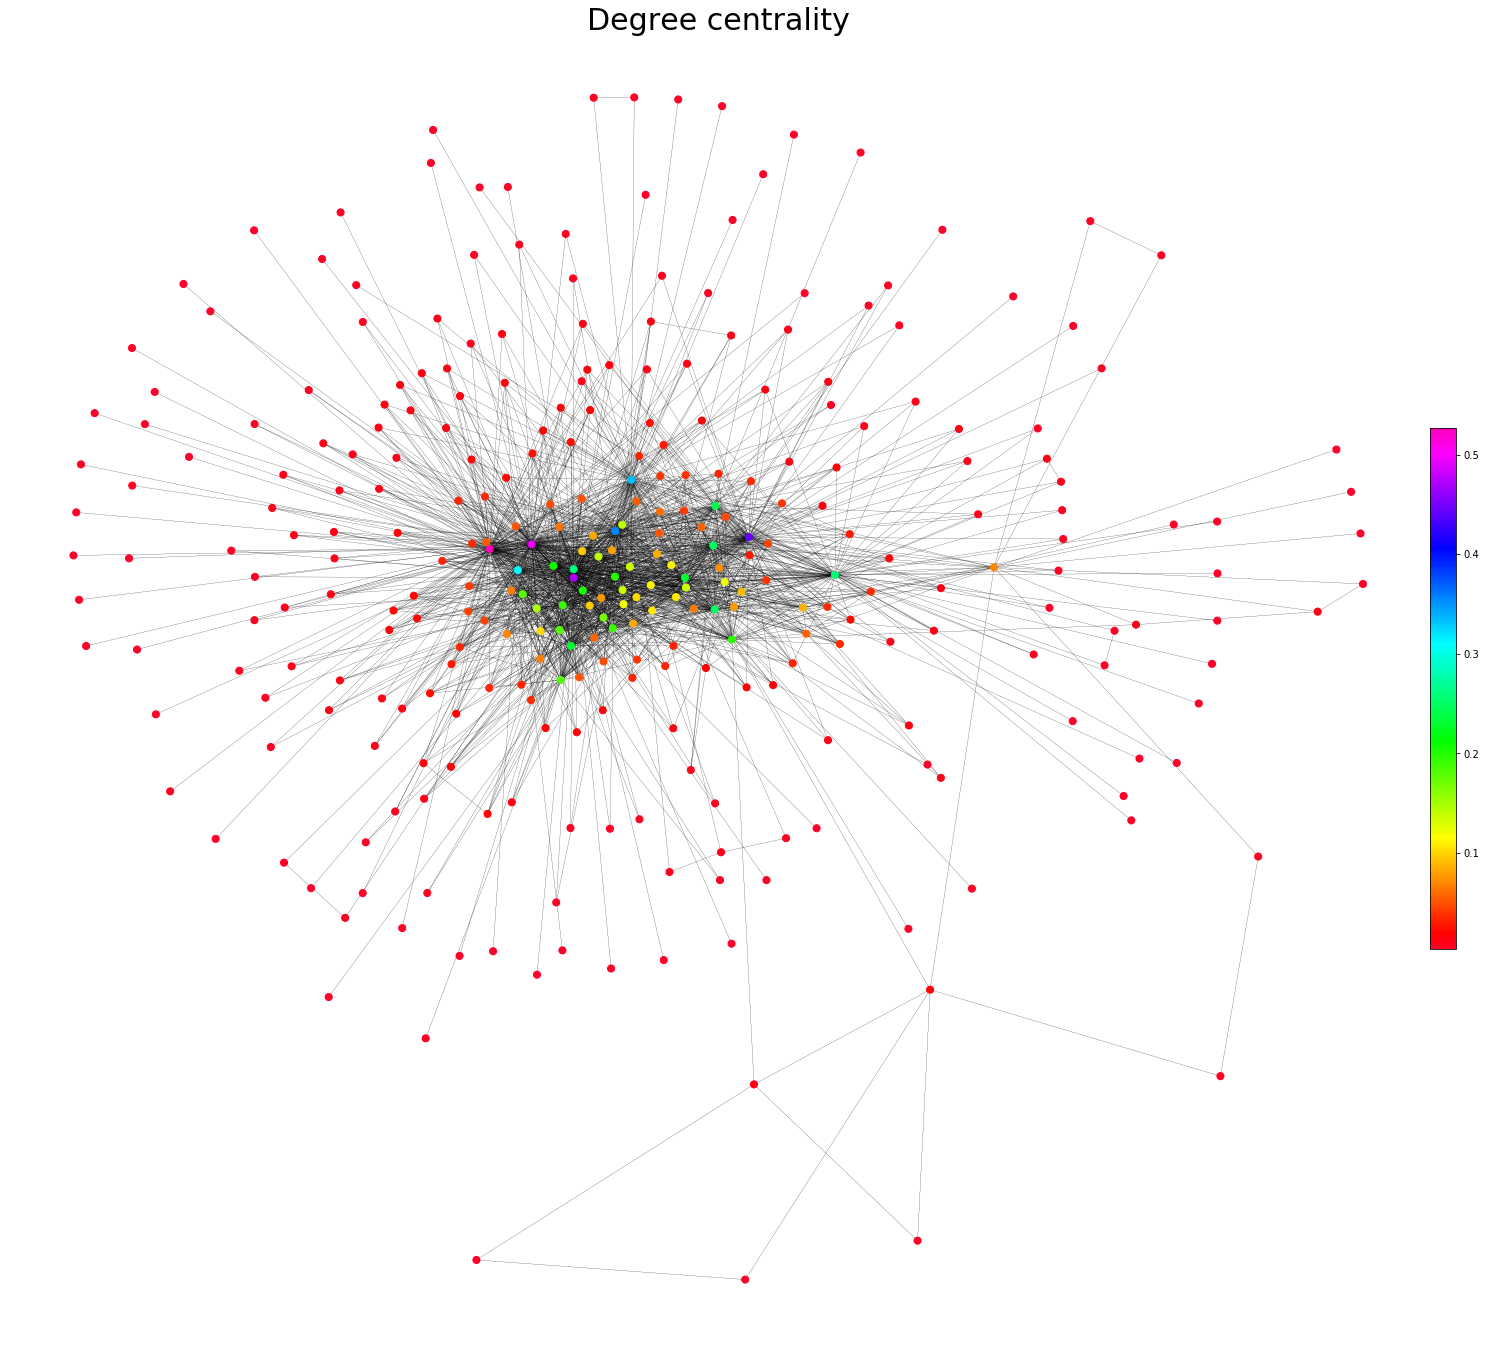

In [51]:
plt.figure(figsize=(30,24))
degree_centr = nx.degree_centrality(df)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(df, pos, 
                               node_color=node_colors,
                               node_size = 50,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'gist_rainbow',
                               with_labels = True)
edges = nx.draw_networkx_edges(df, pos, width = .2)
# plt.xlim([-.95, 1.05])
# plt.ylim([-.6, .95])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 30)
plt.axis("off")

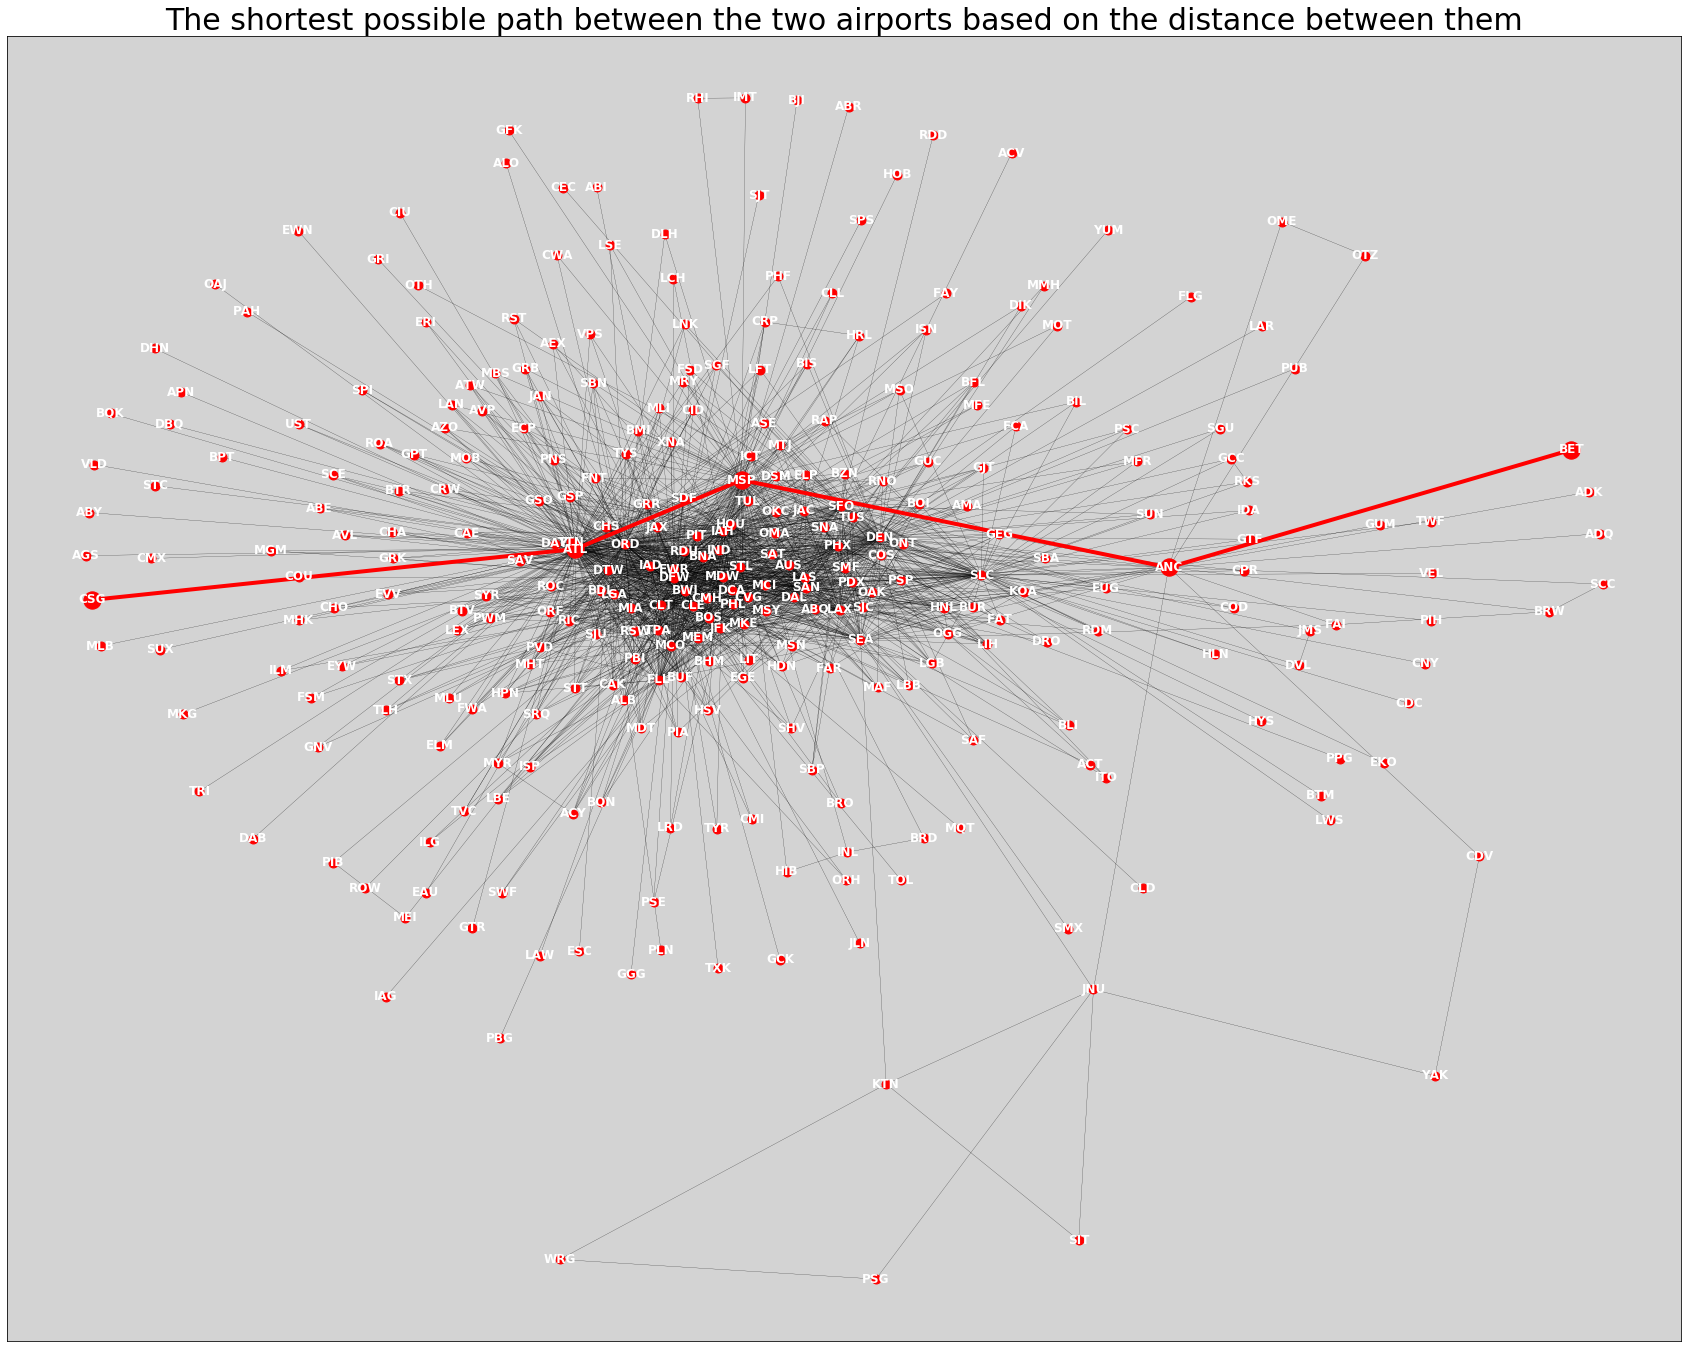

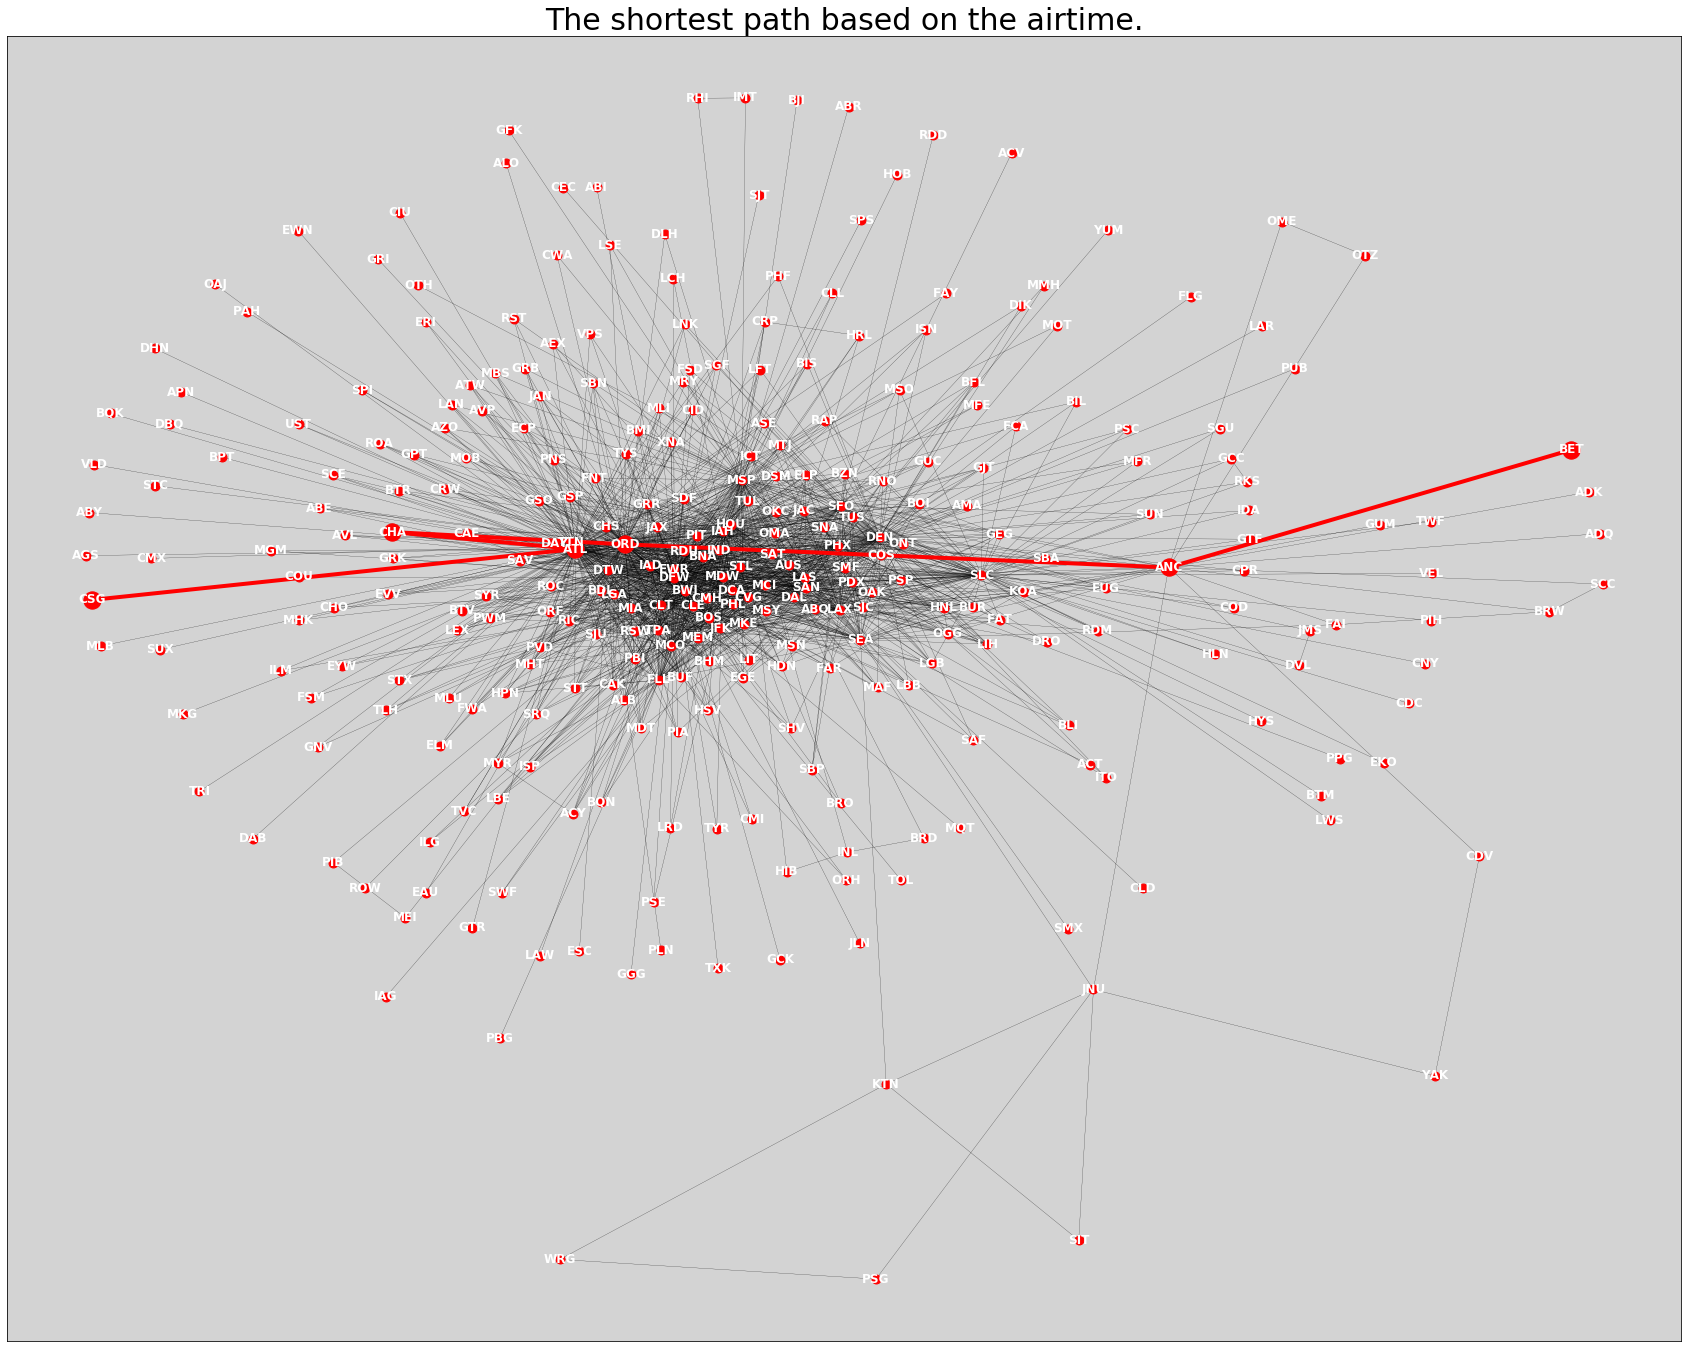

In [74]:
plt.figure(figsize=(30,24))
ax = plt.axes()
ax.set_facecolor("lightgrey")
nx.draw(df, pos, with_labels=True,
                 font_color='white',font_weight='bold', node_color='red', node_size= 80, width= .2)
path = nx.shortest_path(df,source='BET',target='CSG',weight='DISTANCE')
path_edges = zip(path,path[1:])
path_edges = set(path_edges)
nx.draw_networkx_nodes(df,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(df,pos,edgelist=path_edges,edge_color='r',width=4)
plt.title('The shortest possible path between the two airports based on the distance between them', fontsize = 30)
plt.axis('on')
plt.show()

plt.figure(figsize=(30,24))
ax = plt.axes()
ax.set_facecolor("lightgrey")
nx.draw(df, pos, with_labels=True,
                 font_color='white',font_weight='bold', node_color='red', node_size= 80, width= .2)
path = nx.shortest_path(df,source='BET',target='CSG',weight='AIR_TIME')
path_edges = zip(path,path[1:])
path_edges = set(path_edges)
nx.draw_networkx_nodes(df,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(df,pos,edgelist=path_edges,edge_color='r',width=4)
plt.title('The shortest path based on the airtime.', fontsize = 30)
plt.axis('on')
plt.show()